# Telecom Customer Churn Prediction Project

The goal of the present project is to maximize the

The Telco customer churn data contains information about a fictional telco company that provided home phone and Internet services to 7043 customers in California in Q3. It indicates which customers have left, stayed, or signed up for their service.

Information about the Dataset Here  here: https://ieee-dataport.org/documents/wafn-usec-telco-customer-churn  
I created a dictionary for the variables that can be find in the repository

In [1]:
#Due to changes in the version 1.6 of Scikit-learn an inferior version must be used for XGBClassifier to function correctly.
!pip uninstall -y scikit-learn
!pip install scikit-learn==1.5.2

Found existing installation: scikit-learn 1.5.2
Uninstalling scikit-learn-1.5.2:
  Successfully uninstalled scikit-learn-1.5.2


  Using cached scikit_learn-1.5.2-cp313-cp313-win_amd64.whl.metadata (13 kB)
Using cached scikit_learn-1.5.2-cp313-cp313-win_amd64.whl (11.0 MB)



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# I import the libraries that will be used in this project 

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from scipy import stats
import optuna
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score, make_scorer
from sklearn.model_selection import cross_val_score

c:\Users\vicsa\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
DIR = "C:/Users/vicsa/OneDrive/Documents/Personal/Projects/telecom-churn-prediction-project"
df = pd.read_csv("WA_telco_data.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
#calculos estadisticos de la base de datos
df.describe(include='all')

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,...,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,...,3,3,3,3,3,2,4,NaN,6531,2
top,3186-AJIEK,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,20.2,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,...,3095,3473,2810,2785,3875,4171,2365,NaN,11,5174
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN


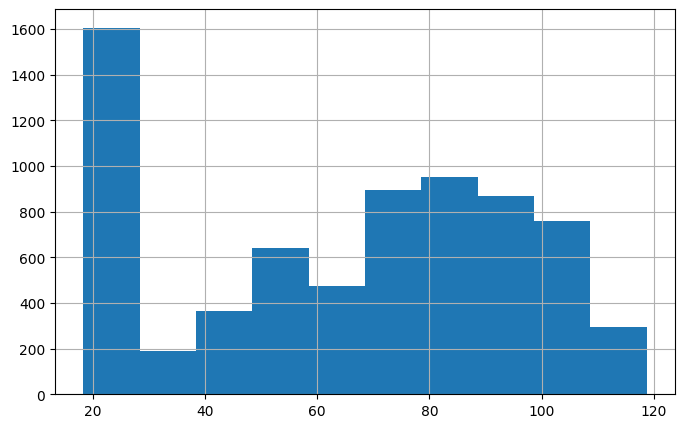

In [6]:
df["MonthlyCharges"].hist(figsize=(8,5));
                                

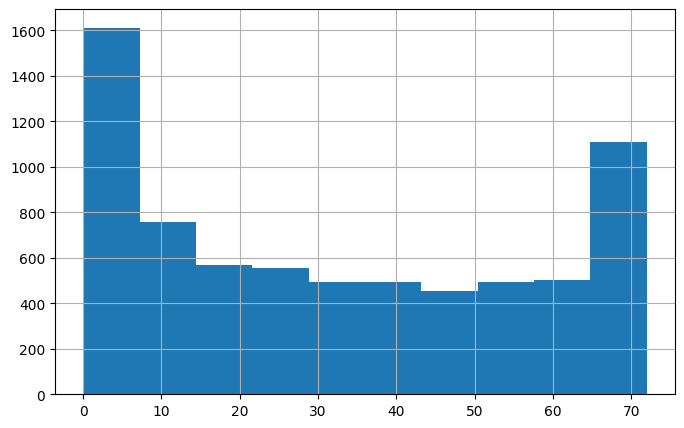

In [7]:
df["tenure"].hist(figsize=(8,5));

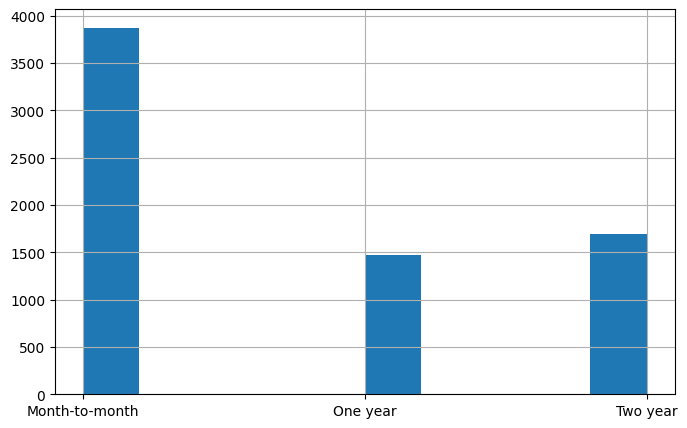

In [8]:
df["Contract"].hist(figsize=(8,5));

In [9]:
df['InternetService'].value_counts()

InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64

In [10]:
df['Contract'].value_counts()

Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64

In [11]:
df['PaymentMethod'].value_counts()

PaymentMethod
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: count, dtype: int64

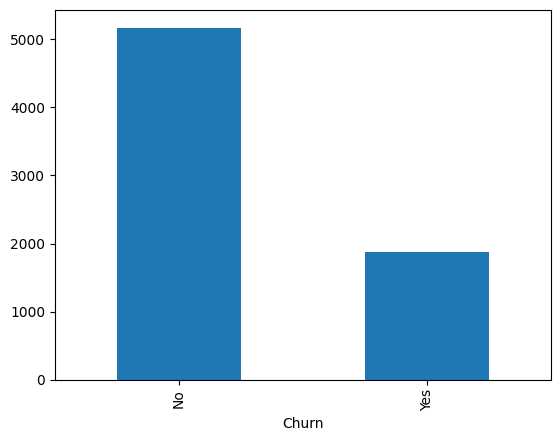

In [12]:
df['Churn'].value_counts().plot(kind='bar')
plt.show()

# Feature Engineering

In [13]:
# I create dummies for the boolean columns
df = pd.get_dummies(df, prefix=['gender', 'PaymentMethod', 'InternetService','Contract'], columns=['gender', 'PaymentMethod', 'InternetService','Contract'])
df.head()

,customerID,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year
0,7590-VHVEG,0,Yes,No,1,No,No phone service,No,Yes,No,...,False,False,True,False,True,False,False,True,False,False
1,5575-GNVDE,0,No,No,34,Yes,No,Yes,No,Yes,...,False,False,False,True,True,False,False,False,True,False
2,3668-QPYBK,0,No,No,2,Yes,No,Yes,Yes,No,...,False,False,False,True,True,False,False,True,False,False
3,7795-CFOCW,0,No,No,45,No,No phone service,Yes,No,Yes,...,True,False,False,False,True,False,False,False,True,False
4,9237-HQITU,0,No,No,2,Yes,No,No,No,No,...,False,False,True,False,False,True,False,True,False,False


In [14]:
# I eliminate the column gender_Male for correlation with gender_Female
df = df.drop('gender_Male', axis=1)
df.head()

,customerID,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year
0,7590-VHVEG,0,Yes,No,1,No,No phone service,No,Yes,No,...,False,False,True,False,True,False,False,True,False,False
1,5575-GNVDE,0,No,No,34,Yes,No,Yes,No,Yes,...,False,False,False,True,True,False,False,False,True,False
2,3668-QPYBK,0,No,No,2,Yes,No,Yes,Yes,No,...,False,False,False,True,True,False,False,True,False,False
3,7795-CFOCW,0,No,No,45,No,No phone service,Yes,No,Yes,...,True,False,False,False,True,False,False,False,True,False
4,9237-HQITU,0,No,No,2,Yes,No,No,No,No,...,False,False,True,False,False,True,False,True,False,False


In [15]:
# Nophoneserveice /NoInternetService in columns that have it
df['MultipleLines'] = df['MultipleLines'].map({'No': 0, 'No phone service': 0, 'Yes': 1})
df['OnlineSecurity'] = df['OnlineSecurity'].map({'No': 0, 'No internet service': 0, 'Yes': 1})
df['OnlineBackup'] = df['OnlineBackup'].map({'No': 0, 'No internet service': 0, 'Yes': 1})
df['DeviceProtection'] = df['DeviceProtection'].map({'No': 0, 'No internet service': 0, 'Yes': 1})
df['TechSupport'] = df['TechSupport'].map({'No': 0, 'No internet service': 0, 'Yes': 1})
df['StreamingTV'] = df['StreamingTV'].map({'No': 0, 'No internet service': 0, 'Yes': 1})
df['StreamingMovies'] = df['StreamingMovies'].map({'No': 0, 'No internet service': 0, 'Yes': 1})

df.head()

,customerID,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year
0,7590-VHVEG,0,Yes,No,1,No,0,0,1,0,...,False,False,True,False,True,False,False,True,False,False
1,5575-GNVDE,0,No,No,34,Yes,0,1,0,1,...,False,False,False,True,True,False,False,False,True,False
2,3668-QPYBK,0,No,No,2,Yes,0,1,1,0,...,False,False,False,True,True,False,False,True,False,False
3,7795-CFOCW,0,No,No,45,No,0,1,0,1,...,True,False,False,False,True,False,False,False,True,False
4,9237-HQITU,0,No,No,2,Yes,0,0,0,0,...,False,False,True,False,False,True,False,True,False,False


In [16]:
df['Partner'] = df['Partner'].map({'No': 0, 'Yes': 1})
df['Dependents'] = df['Dependents'].map({'No': 0, 'Yes': 1})
df['PhoneService'] = df['PhoneService'].map({'No': 0, 'Yes': 1}) 
df['PaperlessBilling'] = df['PaperlessBilling'].map({'No': 0, 'Yes': 1}) 
df['Churn'] = df['Churn'].map({'No': 0, 'Yes': 1})

df.head()

,customerID,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year
0,7590-VHVEG,0,1,0,1,0,0,0,1,0,...,False,False,True,False,True,False,False,True,False,False
1,5575-GNVDE,0,0,0,34,1,0,1,0,1,...,False,False,False,True,True,False,False,False,True,False
2,3668-QPYBK,0,0,0,2,1,0,1,1,0,...,False,False,False,True,True,False,False,True,False,False
3,7795-CFOCW,0,0,0,45,0,0,1,0,1,...,True,False,False,False,True,False,False,False,True,False
4,9237-HQITU,0,0,0,2,1,0,0,0,0,...,False,False,True,False,False,True,False,True,False,False


In [17]:
df[['TotalCharges']] = df[['TotalCharges']].apply(lambda col: pd.to_numeric(col, errors='coerce'))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 28 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   customerID                               7043 non-null   object 
 1   SeniorCitizen                            7043 non-null   int64  
 2   Partner                                  7043 non-null   int64  
 3   Dependents                               7043 non-null   int64  
 4   tenure                                   7043 non-null   int64  
 5   PhoneService                             7043 non-null   int64  
 6   MultipleLines                            7043 non-null   int64  
 7   OnlineSecurity                           7043 non-null   int64  
 8   OnlineBackup                             7043 non-null   int64  
 9   DeviceProtection                         7043 non-null   int64  
 10  TechSupport                              7043 no

In [18]:
df['ChargesAmount'] = df['TotalCharges']/df['MonthlyCharges']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 29 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   customerID                               7043 non-null   object 
 1   SeniorCitizen                            7043 non-null   int64  
 2   Partner                                  7043 non-null   int64  
 3   Dependents                               7043 non-null   int64  
 4   tenure                                   7043 non-null   int64  
 5   PhoneService                             7043 non-null   int64  
 6   MultipleLines                            7043 non-null   int64  
 7   OnlineSecurity                           7043 non-null   int64  
 8   OnlineBackup                             7043 non-null   int64  
 9   DeviceProtection                         7043 non-null   int64  
 10  TechSupport                              7043 no

# Training Strategy


In [19]:
df_training = df.select_dtypes(include=['float64', 'int64', 'int32', 'int16', 'int8', 'bool'])

X = df_training[df_training.columns.drop('Churn')]
y = df_training['Churn']

In [20]:
# Define multiple seeds
seeds = [101111, 230519, 450179, 720637, 990653]  # Add any number of seeds here

# Store results
results = []

# Define revenue calculation function
def calculate_revenue(predicted, actual):
    if predicted == 1 and actual == 1:
        return 100000
    elif predicted == 0 and actual == 0:
        return 0
    elif predicted == 1 and actual == 0:
        return -5000  # Updated based on your change

# Iterate through different seeds
for seed in seeds:
    print(f"Running model with seed: {seed}")
    
    # Set the seed for reproducibility
    np.random.seed(seed)

    # Splitting dataset
    X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.25, random_state=seed)
    X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=1/3, random_state=seed)

    # Define Optuna study with seed
    study = optuna.create_study(direction="maximize", sampler=optuna.samplers.TPESampler(seed=seed))
    
    def objective(trial):
        param = {
            'max_depth': trial.suggest_int('max_depth', 2, 10),
            'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 0.3),
            'n_estimators': trial.suggest_int('n_estimators', 50, 500),
            'subsample': trial.suggest_float('subsample', 0.5, 1.0),
            'gamma': trial.suggest_float('gamma', 0, 5),
            'reg_alpha': trial.suggest_float('reg_alpha', 0, 10),
            'reg_lambda': trial.suggest_float('reg_lambda', 0, 10),
            #'booster': trial.suggest_categorical('booster', ['gbtree', 'dart'])
        }
        clf = XGBClassifier(**param, random_state=seed)
        score = cross_val_score(clf, X_train, y_train, cv=3, scoring='roc_auc').mean()
        return score

    # Optimize hyperparameters
    study.optimize(objective, n_trials=50)  # Adjust n_trials as needed

    # Train final model
    best_params = study.best_params
    clf = XGBClassifier(**best_params, random_state=seed)
    clf.fit(X_train, y_train)

    # Validation & Test Scores
    val_roc_auc = roc_auc_score(y_val, clf.predict_proba(X_val)[:, 1])
    test_roc_auc = roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])

    # Predictions
    y_test_pred = clf.predict(X_test)

    # Create output DataFrame
    output_df = pd.DataFrame({'Predicted_Churn': y_test_pred, 'Actual_Churn': y_test.values})

    # Apply revenue calculation
    output_df['Revenue_Score'] = output_df.apply(lambda row: calculate_revenue(row['Predicted_Churn'], row['Actual_Churn']), axis=1)

    # Calculate total revenue and possible revenue
    total_revenue = output_df['Revenue_Score'].sum()
    total_possible_revenue = (y_test * 100000).sum()  # If all churn cases were correctly identified

    # Store results
    results.append({
        'Seed': seed,
        'Validation ROC AUC': val_roc_auc,
        'Test ROC AUC': test_roc_auc,
        'Total Revenue': total_revenue,
        'Total Possible Revenue': total_possible_revenue
    })

# Convert results into a DataFrame for analysis
results_df = pd.DataFrame(results)


[I 2025-02-14 21:01:20,753] A new study created in memory with name: no-name-46cec13d-4b6d-4b74-95c4-c59ab0ca7cd9


Running model with seed: 101111


C:\Users\vicsa\AppData\Local\Temp\ipykernel_24956\3891582293.py:33: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 0.3),
[I 2025-02-14 21:01:21,614] Trial 0 finished with value: 0.8446164468609595 and parameters: {'max_depth': 7, 'learning_rate': 0.005415016331895069, 'n_estimators': 283, 'subsample': 0.9922282936788676, 'gamma': 4.454199176939572, 'reg_alpha': 1.025947363144577, 'reg_lambda': 6.070370750635843}. Best is trial 0 with value: 0.8446164468609595.
C:\Users\vicsa\AppData\Local\Temp\ipykernel_24956\3891582293.py:33: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_logu

Running model with seed: 230519


[I 2025-02-14 21:01:56,376] Trial 0 finished with value: 0.8451875129787049 and parameters: {'max_depth': 7, 'learning_rate': 0.030321111601005618, 'n_estimators': 151, 'subsample': 0.5102998120392317, 'gamma': 4.106851775682267, 'reg_alpha': 9.775228909481312, 'reg_lambda': 6.155037526681797}. Best is trial 0 with value: 0.8451875129787049.
C:\Users\vicsa\AppData\Local\Temp\ipykernel_24956\3891582293.py:33: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 0.3),
[I 2025-02-14 21:01:56,682] Trial 1 finished with value: 0.8508577049018947 and parameters: {'max_depth': 8, 'learning_rate': 0.29472718522165553, 'n_estimators': 140, 'subsample': 0.6937275473266885, 'gamma': 3.7043202245995577, 'reg_alpha': 4.052658601017189, 'reg_lambda': 9.938264669340972}. Best is trial 

Running model with seed: 450179


C:\Users\vicsa\AppData\Local\Temp\ipykernel_24956\3891582293.py:33: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 0.3),
[I 2025-02-14 21:02:31,533] Trial 0 finished with value: 0.8280827924028341 and parameters: {'max_depth': 3, 'learning_rate': 0.0012976074329661134, 'n_estimators': 319, 'subsample': 0.9840367084746804, 'gamma': 4.056359027250193, 'reg_alpha': 2.4548145995859336, 'reg_lambda': 9.007384711538682}. Best is trial 0 with value: 0.8280827924028341.
C:\Users\vicsa\AppData\Local\Temp\ipykernel_24956\3891582293.py:33: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_lo

Running model with seed: 720637


[I 2025-02-14 21:02:56,735] Trial 0 finished with value: 0.8415103497721139 and parameters: {'max_depth': 5, 'learning_rate': 0.019587607134700674, 'n_estimators': 193, 'subsample': 0.6180261896514447, 'gamma': 3.042268324201702, 'reg_alpha': 4.873737676706275, 'reg_lambda': 5.997284326302821}. Best is trial 0 with value: 0.8415103497721139.
C:\Users\vicsa\AppData\Local\Temp\ipykernel_24956\3891582293.py:33: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 0.3),
[I 2025-02-14 21:02:57,321] Trial 1 finished with value: 0.8297148289951938 and parameters: {'max_depth': 6, 'learning_rate': 0.0038831314141392777, 'n_estimators': 201, 'subsample': 0.7509055137044411, 'gamma': 3.774137493014655, 'reg_alpha': 6.101544497504684, 'reg_lambda': 2.2984137596401712}. Best is tria

Running model with seed: 990653


[I 2025-02-14 21:03:22,560] Trial 0 finished with value: 0.8320267282217165 and parameters: {'max_depth': 3, 'learning_rate': 0.01214772949472978, 'n_estimators': 113, 'subsample': 0.5073004118191589, 'gamma': 4.285636943923485, 'reg_alpha': 5.404612881201551, 'reg_lambda': 1.4270331338113307}. Best is trial 0 with value: 0.8320267282217165.
C:\Users\vicsa\AppData\Local\Temp\ipykernel_24956\3891582293.py:33: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 0.3),
[I 2025-02-14 21:03:22,997] Trial 1 finished with value: 0.8317852333591471 and parameters: {'max_depth': 4, 'learning_rate': 0.001876584009704607, 'n_estimators': 136, 'subsample': 0.9506506426236119, 'gamma': 4.025544148644197, 'reg_alpha': 1.1649540172204387, 'reg_lambda': 0.35756207000911866}. Best is tri

In [21]:
print(results_df)

     Seed  Validation ROC AUC  Test ROC AUC  Total Revenue  \
0  101111            0.839403      0.848183     26190000.0   
1  230519            0.854373      0.829490     24360000.0   
2  450179            0.834815      0.840959     24290000.0   
3  720637            0.852368      0.846531     23410000.0   
4  990653            0.857251      0.850188     24550000.0   

   Total Possible Revenue  
0                48400000  
1                49200000  
2                47600000  
3                46600000  
4                46500000  


# Bayesian Optimization

Explain why Bayesian and why XGBoos (Handle NA values, velocity,etc)
max_depth': sp_randint(3,6),
              'learning_rate': sp_randfloat(0.01, 0.1),
              'n_estimators': sp_randint(100, 1000),
              'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
              'reg_alpha': sp_randfloat(0.0, 1.0),
              'reg_lambda': sp_randfloat(0.0, 1.0),

# Final Training & Evaluation

# Predict in Final Test

# Scoring

Get an Outcome that is workable for Finance reasons or something like that